# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# This is an extra step I created to manually view the merged dataset:  
# I saved it into a separate .csv file 
mouse_study_complete.to_csv('data/merged_mouse.csv', index=False)

In [3]:
# Checking the number of mice.
print(len(mouse_metadata))

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse = duplicates['Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_complete[mouse_study_complete['Mouse ID'] != 'g989']
clean_mouse_study.to_csv('data/clean_mouse_study.csv', index=False)

clean_mouse_df = pd.read_csv('data/clean_mouse_study.csv')
clean_mouse_df.head()
# clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
# clean_mouse_study['Mouse ID'].nunique()
# clean_mouse_total = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_df['Mouse ID'].nunique()

248

In [8]:
clean_mouse_df['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_study.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_mouse_mean_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
clean_mouse_median_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
clean_mouse_variance_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
clean_mouse_std_dev = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
clean_mouse_std_err = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistic = pd.DataFrame({
    'Mean Tumor Volume': clean_mouse_mean_tumor,
    'Median Tumor Volume': clean_mouse_median_tumor,
    'Tumor Volume Variance': clean_mouse_variance_tumor,
    'Tumor Volume Std. Dev': clean_mouse_std_dev,
    'Tumor Volume Std. Err.': clean_mouse_std_err   
})

summary_statistic


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_adv = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_stats_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
#Group by Drug Regimen, Mouse ID, Timepoint
#This is an extra step that I created but can be deleted
drug_mouseid_df = clean_mouse_df[['Drug Regimen','Mouse ID','Timepoint']]
drug_mouseid_df.head()

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,0
1,Ketapril,f932,0
2,Ketapril,g107,0
3,Ketapril,a457,0
4,Ketapril,c819,0


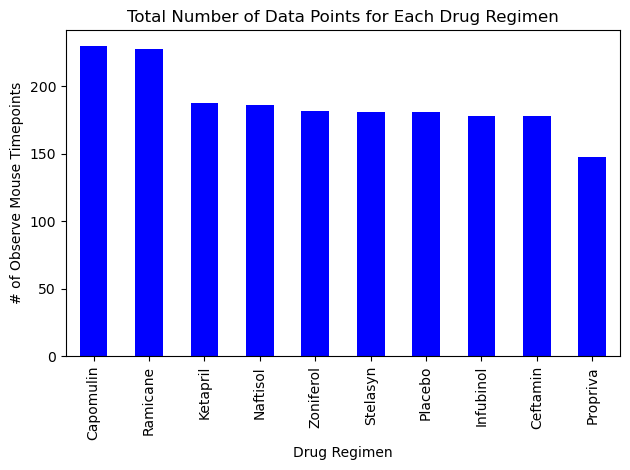

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the occurence of each drug regimen
drug_counts = clean_mouse_df['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observe Mouse Timepoints')
plt.title('Total Number of Data Points for Each Drug Regimen')
plt.tight_layout()
plt.show()

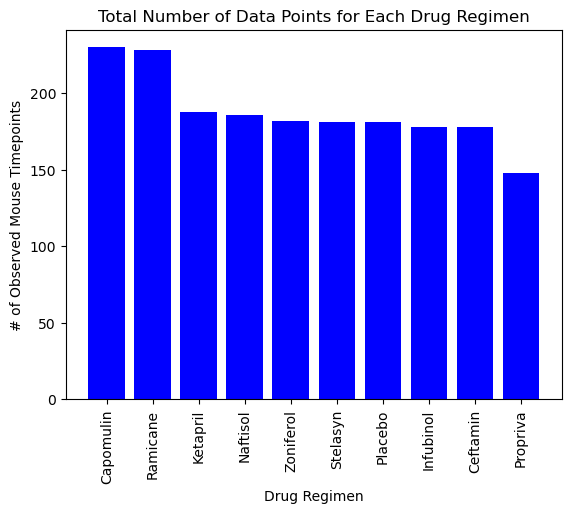

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# plt.bar(x_axis, y_axis, color='blue', align='center')
import numpy as np

drug_counts2 = clean_mouse_df['Drug Regimen'].value_counts()
drugs = drug_counts2.index
# print(drugs)
counts = drug_counts2.values
# print(counts)
x_positions = np.arange(len(drugs))
# print(x_positions)

plt.bar(x_positions, counts, color='blue', align='center')
plt.xticks(x_positions, drugs, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Data Points for Each Drug Regimen')
plt.show()


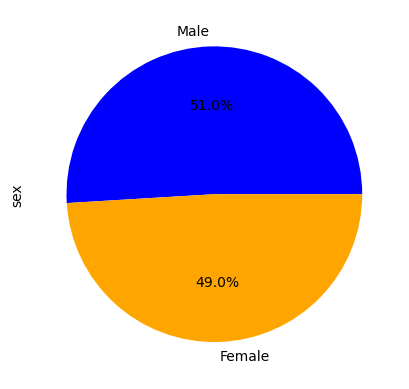

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ['blue', 'orange']
labels = ['Male', 'Female']
mouse_sex_counts = clean_mouse_df['Sex'].value_counts()
# print(mouse_sex_counts)    #Male=958, Female=922
mouse_sex_counts.plot(kind='pie', colors=colors, labels=labels, autopct='%0.1f%%')
plt.ylabel('sex')
plt.show()

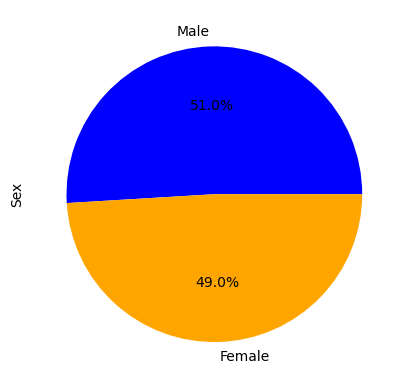

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['blue', 'orange']
labels = ['Male', 'Female']
mouse_sex_counts2 = clean_mouse_df['Sex'].value_counts()
counts2 = mouse_sex_counts2.values
plt.pie(counts2, colors=colors, labels=labels, autopct="%0.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_mouse_df[clean_mouse_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
# display(filtered_df)

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# display(timepoint_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(timepoint_max, filtered_df, how='left', on=['Mouse ID','Timepoint']) 
final_tumor_volume

#Extra step to save final_tumor_volume as .csv for manual review
final_tumor_volume.to_csv('data/final_tumor_volume.csv', index=False)
                                                                          

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = final_tumor_volume['Drug Regimen'].unique()
# treatment                                                  #['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
## Determine the Q1 and Q3 to calculate for IQR
final_tumor_vol_data = final_tumor_volume['Tumor Volume (mm3)']
q1 = final_tumor_vol_data.quantile(0.25)
q3 = final_tumor_vol_data.quantile(0.75)
iqr = q3 - q1
print(q1,q3,iqr)
   
## Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    drug_treatment_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]
    tumor_volume.append(drug_treatment_df['Tumor Volume (mm3)'].tolist())
    
## add subset 
for i, volumes in enumerate(tumor_volume):
    print(f"{treatment[i]}: {volumes}")
    
## Determine outliers using upper and lower bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = final_tumor_volume[(final_tumor_vol_data < lower_bound) | (final_tumor_vol_data > upper_bound)]

#Display the outliers
print(f"Number of outliers: {len(outliers)}")
if len(outliers) > 0:
    print(outliers)


37.1877438025 59.930261755 22.742517952499995
Infubinol: [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]
Ceftamin: [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.7846818, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]
Ramicane: [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.1

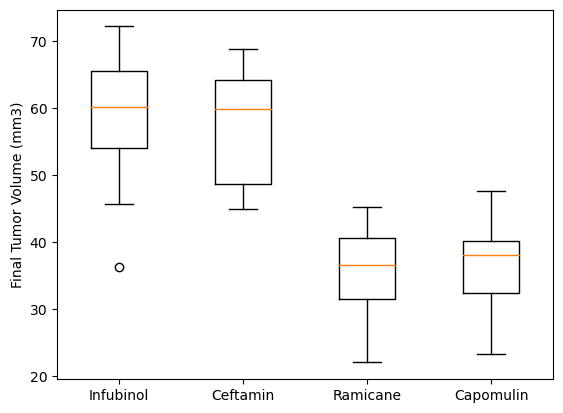

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume, labels=treatment)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

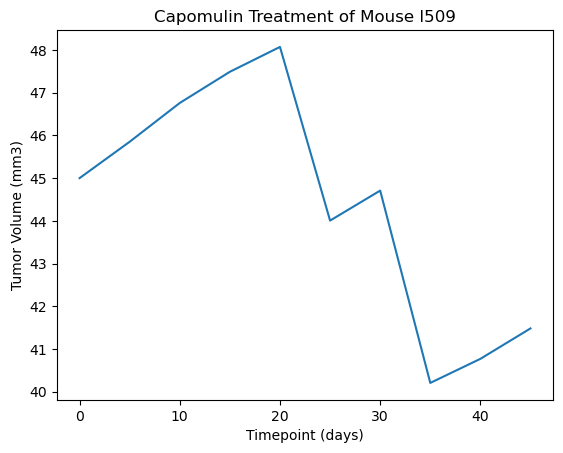

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_df[clean_mouse_df['Mouse ID'] == 'l509']
# print(capomulin_data)

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

plt.show()

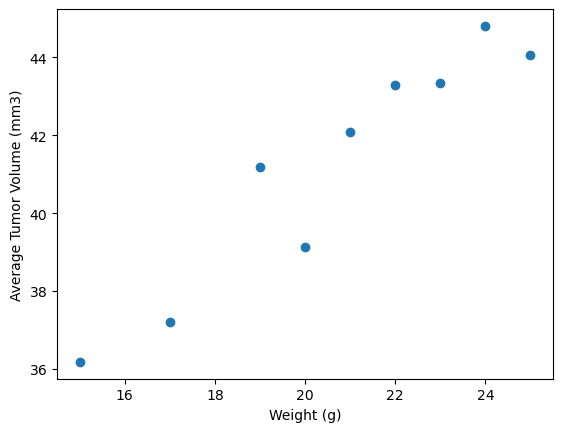

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter data for the Capomulin regimen
capomulin_data = mouse_study_complete[mouse_study_complete['Drug Regimen'] == 'Capomulin']

# Group by Weight and the mean of Tumor Volume
grouped_data = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create Scatter plot
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.95


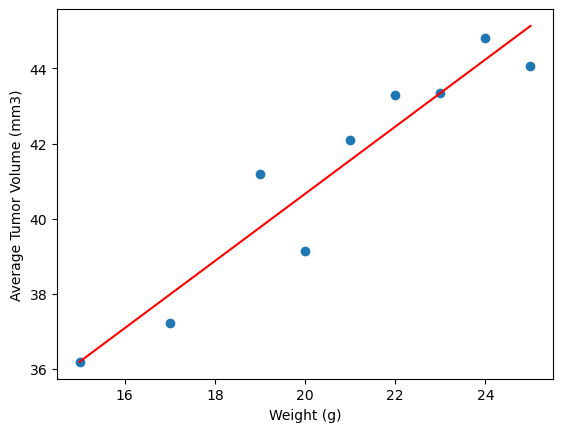

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st

# Assign x and y values
x_values = grouped_data['Weight (g)']
y_values = grouped_data['Tumor Volume (mm3)']

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(x_values, y_values)[0, 1]

# Perform liner regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Create equation of line
regress_values = x_values * slope + intercept

# Create scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient:.2f}")
plt.show()


# print(f"The r-squared is: {rvalue**2:.2f}")
